In [8]:
import xarray as xr
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy.ma as ma
import numpy as np
import cmocean
import matplotlib
%matplotlib inline

In [2]:
def open_data(mois): 
    if mois < 10: 
        m='0'+str(mois)
    else: 
        m = str(mois)
    multi_dataDIR = '/bettik/roussilh/noMED-degrad/eNATL60noMED-BLBT02_y2009m'+m+'*U*.nc'
    TAS1 = xr.open_mfdataset(multi_dataDIR)
    umean = TAS1.degraded_vozocrtx.mean(dim='time_counter')
    return umean

In [3]:
vit0 = open_data(7)
vit1 = open_data(8)
vit2 = open_data(9)
vit3 = open_data(10)
vit4 = open_data(11)
vit5 = open_data(12)

In [4]:
multi_dataDIR = '/bettik/roussilh/noMED-degrad/eNATL60noMED-BLBT02_y2009m07d01.1h_Ubottomdegrad.nc'
TAS1 = xr.open_dataset(multi_dataDIR)
navlon = TAS1.nav_lon
navlat = TAS1.nav_lat
lat0 = navlat[0]
lon0 = navlon[0]

In [5]:
navlat.shape

(1181, 1480)

In [6]:
month_name={7:'juillet', 8:'aout',9:'septembre', 10:'octobre', 11:'novembre',12:'decembre'}
def plot_velocity(var,mois,ax):
    f0 = ax.pcolormesh(navlon, navlat, var, 
                    shading='auto', transform = ccrs.PlateCarree(),
                    vmin=-1, vmax=1, cmap=cmocean.cm.balance)
    grid_lines = ax.gridlines(draw_labels = True)
    grid_lines.xformatter = LONGITUDE_FORMATTER
    grid_lines.yformatter = LATITUDE_FORMATTER
    grid_lines.xlocator = mticker.FixedLocator(np.arange(-90,10,20))
    grid_lines.ylocator = mticker.FixedLocator(np.arange(0,70,10))
    grid_lines.ylabels_right = False
    grid_lines.xlabels_top = False
    ax.set_title(month_name[mois])
    ax.add_feature(cfeature.COASTLINE)
    return f0


/tmp/ipykernel_45074/1764173453.py:23: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbbox_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('Moy_v_Ubottom_2009.png', bbbox_inches='tight')


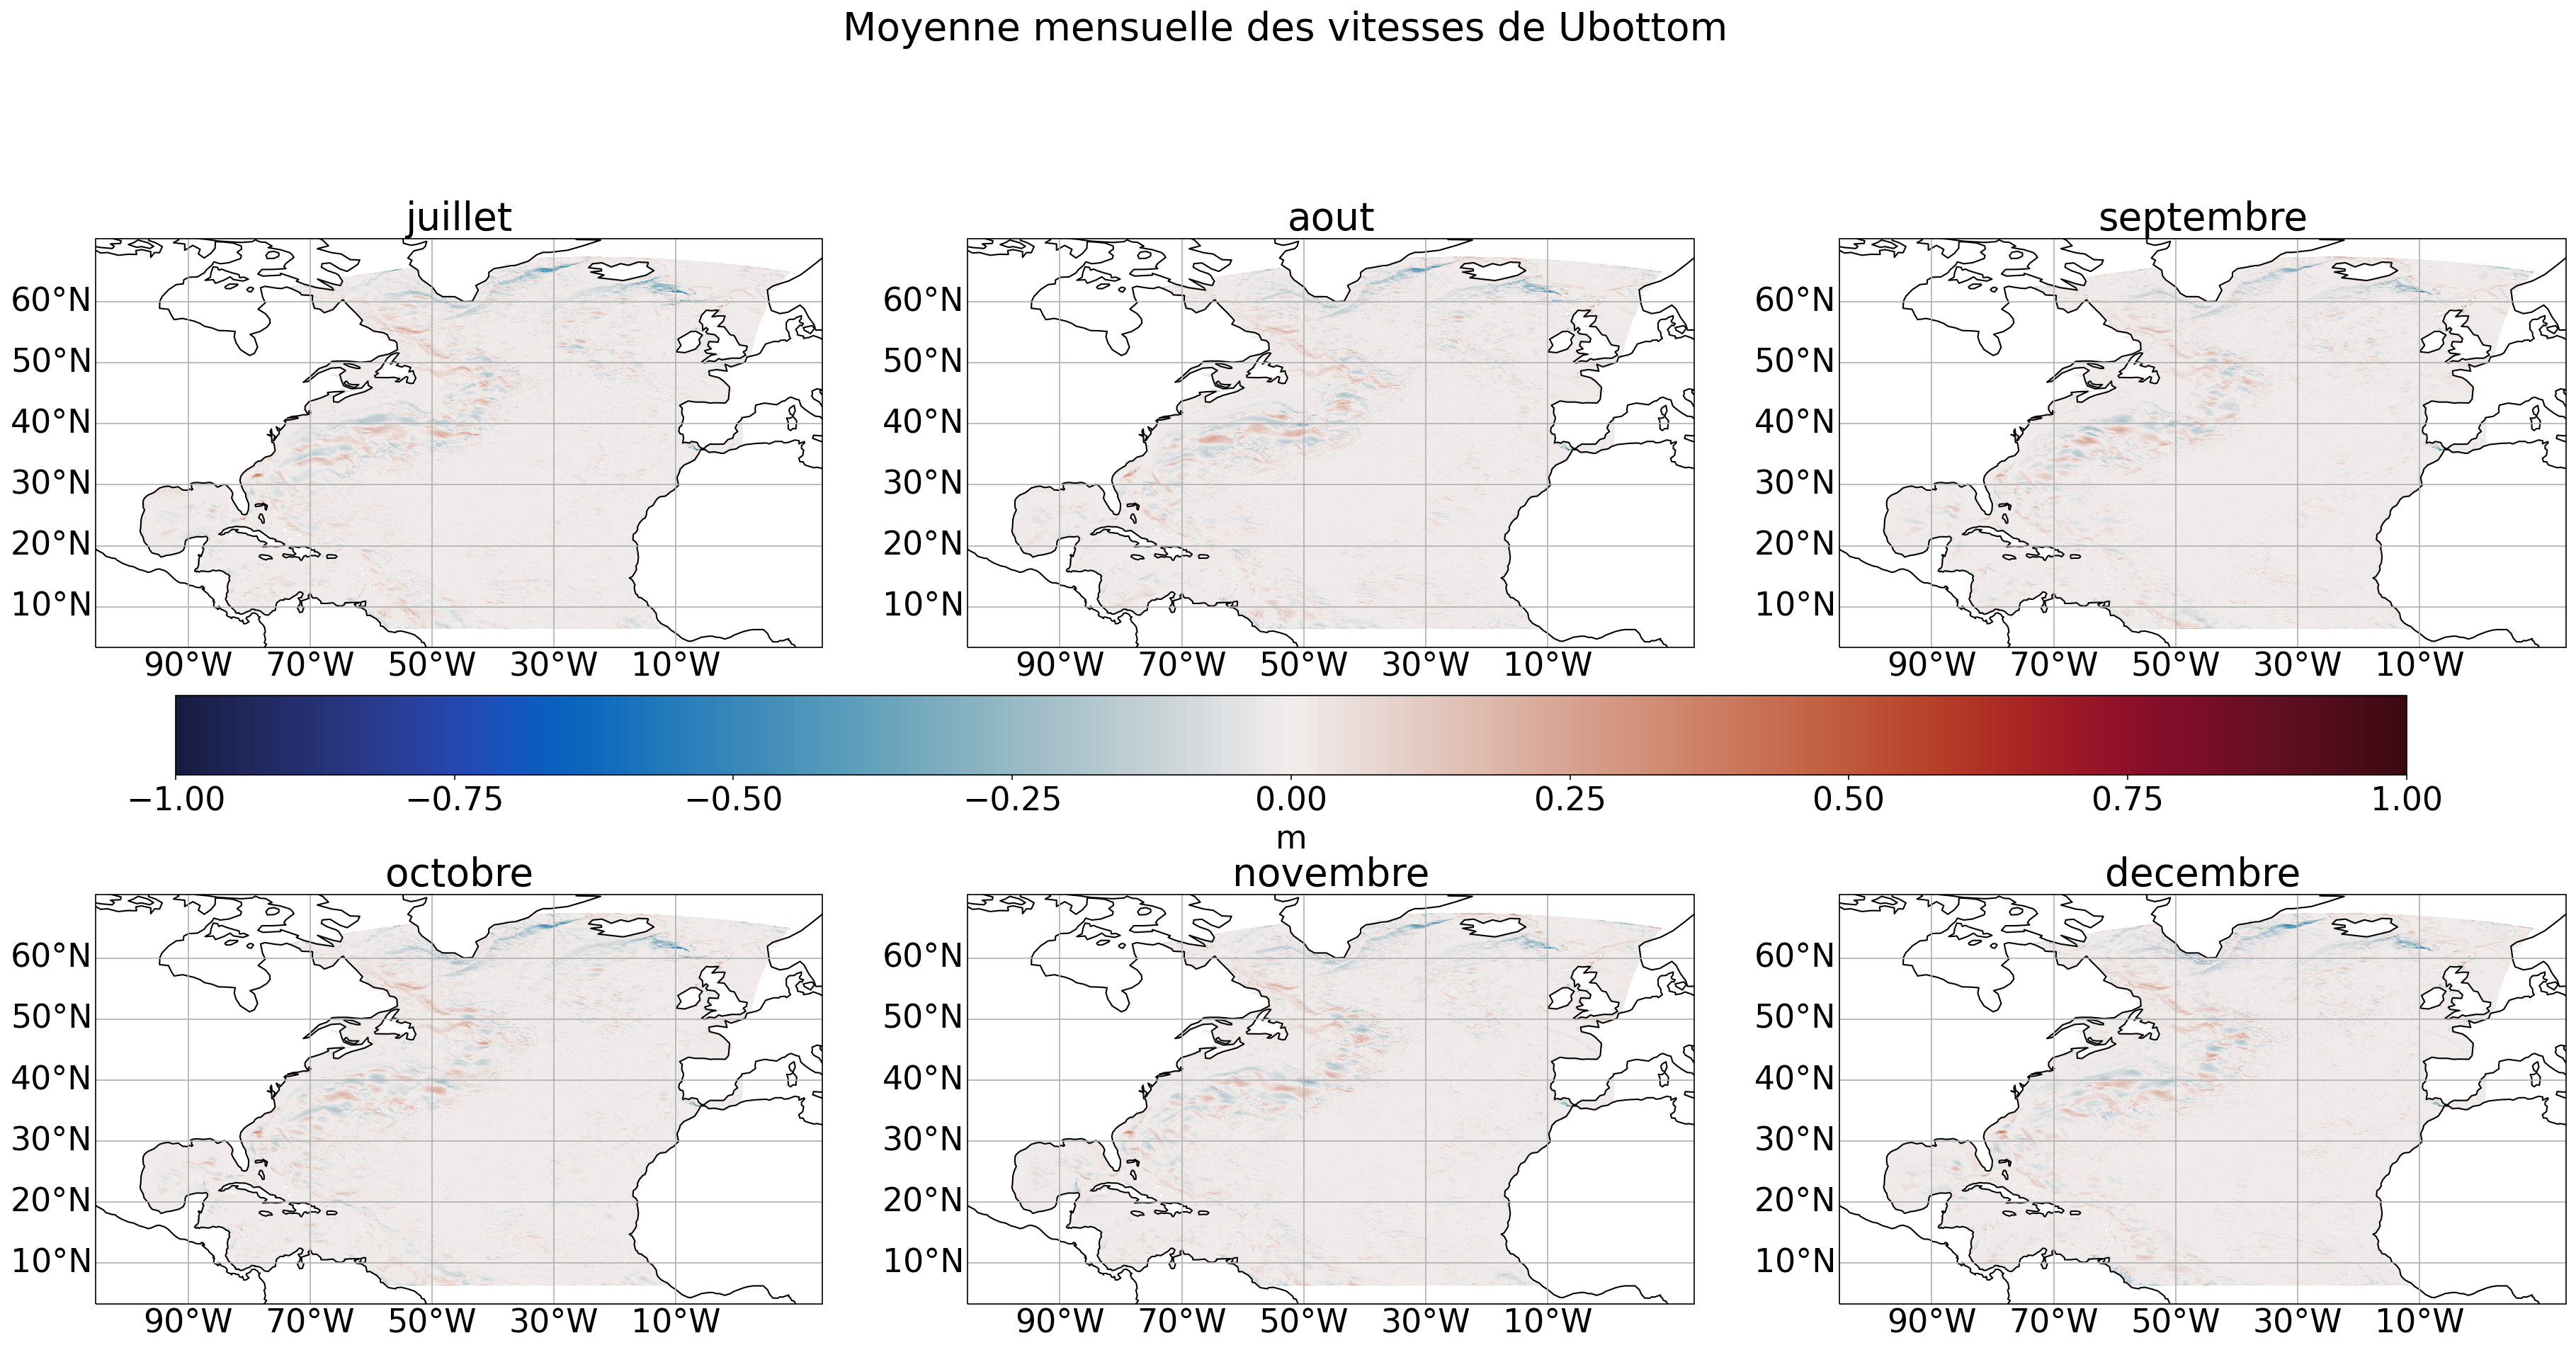

In [9]:
fig1 = plt.figure(figsize=(30, 15), dpi=150)

matplotlib.rcParams.update({'font.size': 22})

ax0 = plt.subplot(231, projection=ccrs.PlateCarree())
f0= plot_velocity(vit0,7,ax0)
ax1 = plt.subplot(232, projection=ccrs.PlateCarree())
f1= plot_velocity(vit1,8,ax1)
ax2 = plt.subplot(233, projection=ccrs.PlateCarree())
f2= plot_velocity(vit2,9,ax2)
ax3 = plt.subplot(234, projection=ccrs.PlateCarree())
f3= plot_velocity(vit3,10,ax3)
ax4 = plt.subplot(235, projection=ccrs.PlateCarree())
f4= plot_velocity(vit4,11,ax4)
ax5 = plt.subplot(236, projection=ccrs.PlateCarree())
f5= plot_velocity(vit5,12,ax5)

cbar_ax= fig1.add_axes([0.15,0.5,0.7,0.05])
cbar = plt.colorbar(f0, orientation='horizontal', cax = cbar_ax,label='m')


plt.suptitle('Moyenne mensuelle des vitesses de Ubottom ')
plt.savefig('Moy_v_Ubottom_2009.png', bbbox_inches='tight')
